In [2]:
# for data analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import wordcloud
from wordcloud import WordCloud

# Text Processing
import re
from collections import Counter
import nltk

### Reading the data

In [3]:
data = pd.read_csv("mbti.csv") 
data.head(10)

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...
8  INFJ  I'm not sure, that's a good question. The dist...
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...

### Data description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [5]:
data.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

In [6]:
# List out All the personality types listed in the dataset
types = np.unique(np.array(data['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [7]:
# Total count of each personality type
# Multiplying by a factor of 50 as each row contains 50 posts
total = data.groupby(['type']).count()
total['posts'] *= 50
print(total)

      posts
type       
ENFJ   9500
ENFP  33750
ENTJ  11550
ENTP  34250
ESFJ   2100
ESFP   2400
ESTJ   1950
ESTP   4450
INFJ  73500
INFP  91600
INTJ  54550
INTP  65200
ISFJ   8300
ISFP  13550
ISTJ  10250
ISTP  16850


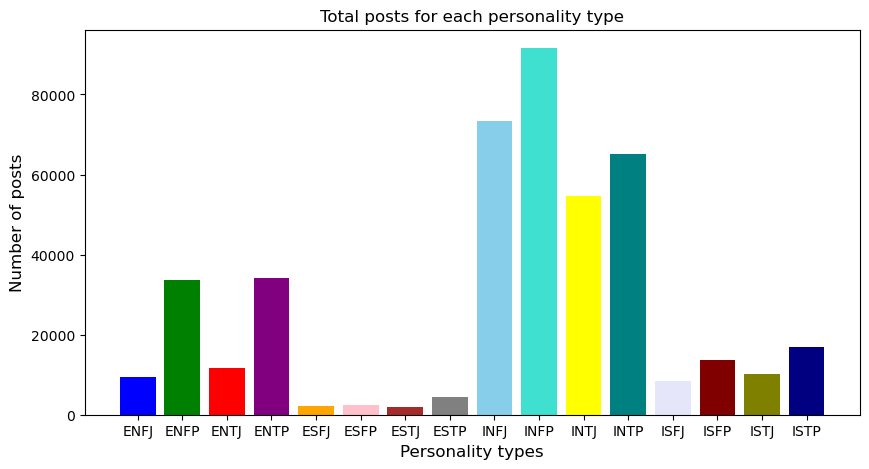

In [8]:
# Define colors for each personality type
colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'brown', 'gray', 'skyblue', 'turquoise', 'yellow', 'teal', 'lavender', 'maroon', 'olive', 'navy']

# Plot count for all posts with specified colors
plt.figure(figsize=(10, 5))
plt.bar(np.array(total.index), height=total['posts'], color=colors)
plt.xlabel('Personality types', size=12)
plt.ylabel('Number of posts', size=12)
plt.title('Total posts for each personality type')

plt.show()

In [9]:
df = total.reset_index()
df = df.rename(columns={'posts': 'count','type':'personality type'})
df

personality type  count
0              ENFJ   9500
1              ENFP  33750
2              ENTJ  11550
3              ENTP  34250
4              ESFJ   2100
5              ESFP   2400
6              ESTJ   1950
7              ESTP   4450
8              INFJ  73500
9              INFP  91600
10             INTJ  54550
11             INTP  65200
12             ISFJ   8300
13             ISFP  13550
14             ISTJ  10250
15             ISTP  16850

In [10]:
# Extract the personality types and their counts from the dataframe
personality_types = df['personality type']
counts = df['count']

## EDA

In [11]:
# Creating a pie chart to visualize counts
new_df = pd.DataFrame({'PersonalityType': df['personality type'], 'Count': df['count']})

# A qualitative color sequence is defined as classes are different from each other and there's no sequential order
color_sequence = px.colors.qualitative.Set3

# Creating an interactive pie chart using Plotly Express
fig = px.pie(new_df, values='Count', names='PersonalityType', color_discrete_sequence=color_sequence)

# Update the layout of the chart 
fig.update_layout(
    title='Personality Type Distribution',
    autosize=False,
    width=600,
    height=600
)

# Display the interactive chart
fig.show()

### WordCloud


In [12]:
#Finding the most common words in all posts.
words = list(data["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)


[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546),
 ('when', 34389),
 ('would', 32605),
 ('really', 31369),
 ('all', 31344),
 ('more', 31188),
 ('know', 31130),
 ('they', 29386),
 ('get', 28948),
 ('because', 27438),
 ('am', 27109)]

### Creating the wordcloud

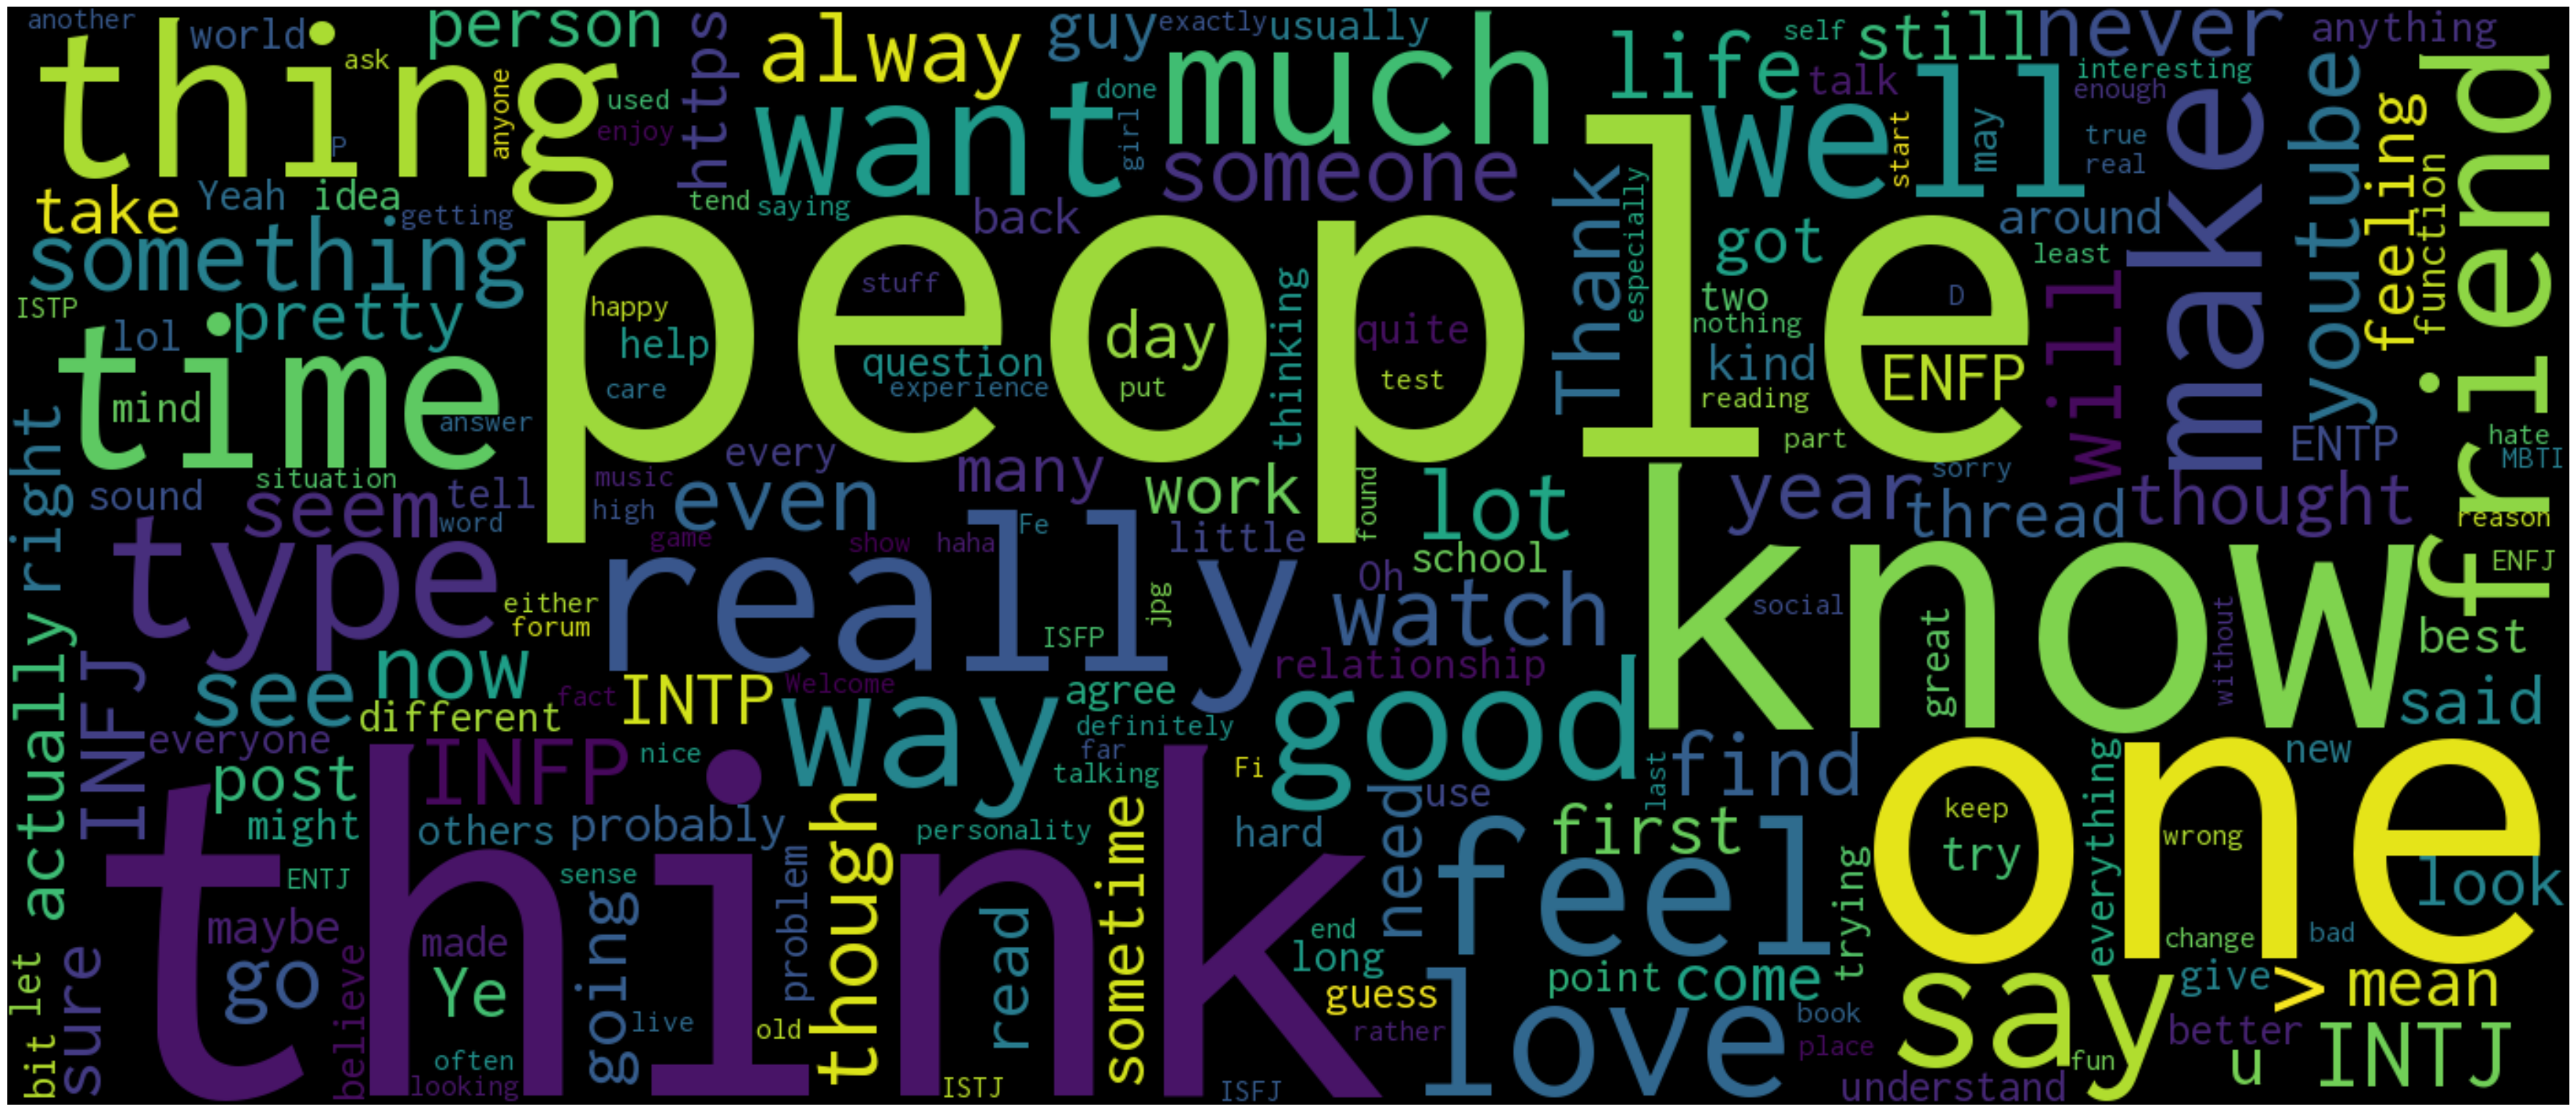

In [13]:
# path to the ttf font file 

font_path = "./inconsolata.ttf" 

# specifying attributes for the wordcloud
# to focus on individual words rather than combinations, setting collocations to False is appropriate
wc = WordCloud(width=1400, height=600, collocations=False, background_color="black", colormap="viridis", font_path=font_path).generate(" ".join(words))
plt.figure(figsize=(45,20))

# interpolation determines the algorithm used for image interpolation when displaying the word cloud
# bilinear helps to reduce pixelation and provides a more continuous appearance for the word cloud image
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Histogram plot for posts column

Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

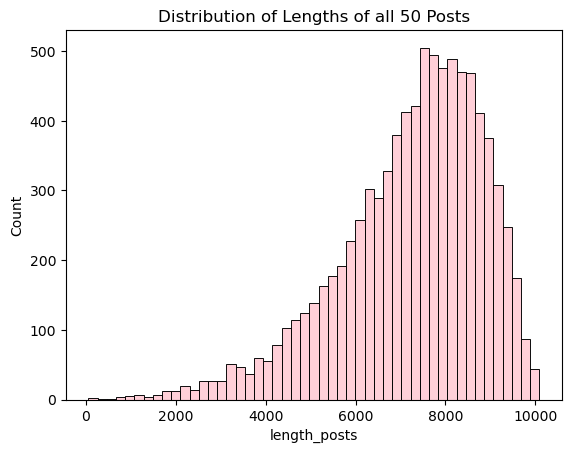

In [14]:
# creating a distance plot for checking distribution of lengths of all 50 posts in each row
data["length_posts"] = data["posts"].apply(len)
sns.histplot(data["length_posts"],color='pink').set_title("Distribution of Lengths of all 50 Posts")

##### We can see that lengthy posts between 7500-9000 words are most in number

### Average post length by personality types

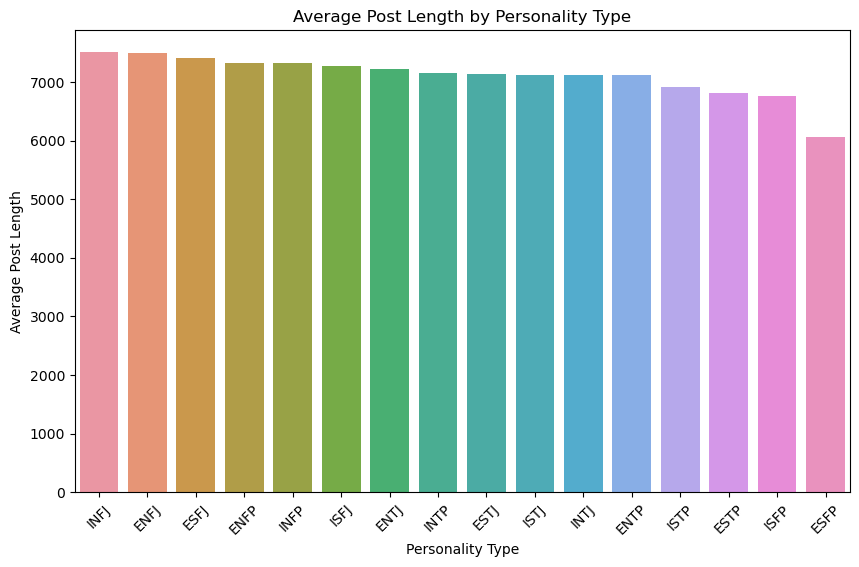

In [15]:
# Calculate the average post length for each personality type
avg_post_length_by_type = data.groupby('type')['length_posts'].mean().sort_values(ascending=False).head(16)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_post_length_by_type.index, y=avg_post_length_by_type.values)
plt.xlabel('Personality Type')
plt.ylabel('Average Post Length')
plt.title('Average Post Length by Personality Type')
plt.xticks(rotation=45)
plt.show()